In [40]:
# Introduction to Dataset
# The dataset I will be using contains 5000 rows and 20 columns. 
# This columns provides insights into key areas like work location (remote, hybrid, onsite), stress levels, 
# access to mental health resources, and overall job satisfaction. 
# There may be potential challenges with the columns on a 1-5 scale. The data didn't specificy if one was the lowest or highest rating. 
   
# Importng libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Loading  the dataset
df = pd.read_csv('dataset mental health and remote work.csv')

# Display first few rows of data
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [41]:
# Summary Statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [42]:
# Check for missing values
print("\nNumber of missing values per column:")
print(df.isna().sum())


Number of missing values per column:
Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [43]:
# Handling Missing Values
# For simplicity, dropping rows with any missing values 
df_cleaned = df.dropna()

In [44]:
# Ensuring no duplicates
duplicates = df_cleaned.duplicated().sum()
if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()

In [45]:
print(f"\nDataset cleaned: {len(df_cleaned)} rows remaining after cleaning.")


Dataset cleaned: 2577 rows remaining after cleaning.


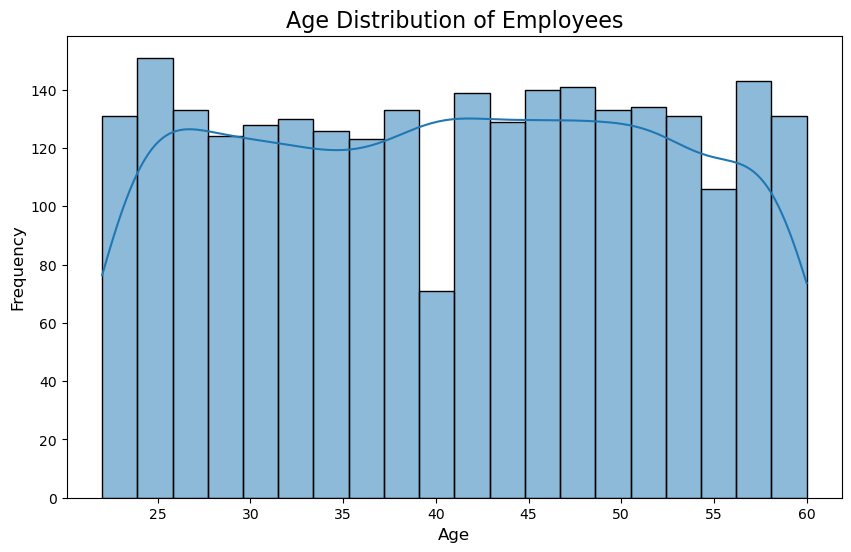

In [46]:
# Visualizations
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [47]:
# Observations:
#The distribution of employee ages is slightly right-skewed, with most employees falling between the ages of 30 and 50.
#The age group around 40 years appears to have the highest frequency, indicating a workforce with mid-career professionals.

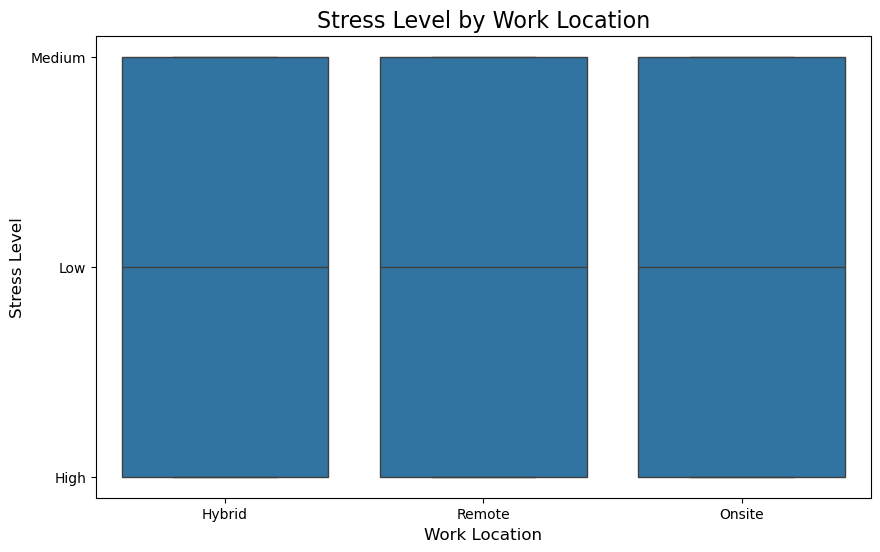

In [49]:
# Stress Level Distribution by Work Location
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Work_Location', y='Stress_Level')
plt.title('Stress Level by Work Location', fontsize=16)
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.show()

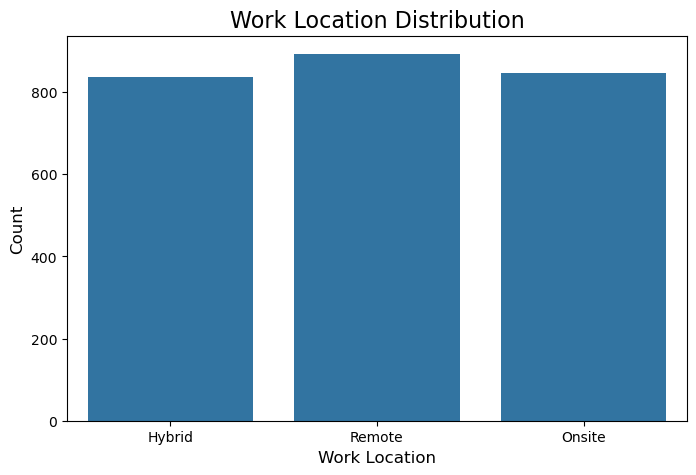

In [50]:
# Work Location Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Work_Location')
plt.title('Work Location Distribution', fontsize=16)
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
# Observations
# High stress levels are the most frequently reported across all genders.
# Females and Males have similar distributions in each stress category, with slightly higher counts for Females in High and Medium stress.

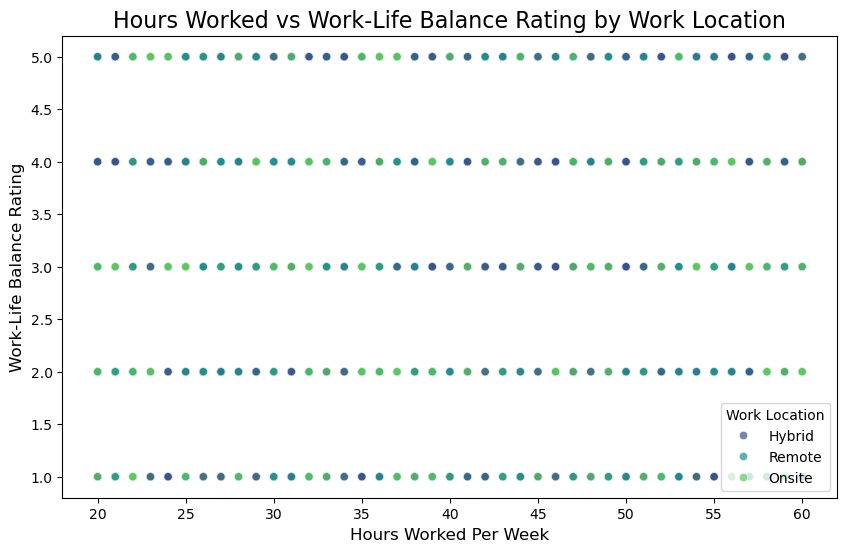

In [58]:
# Scatter Plot: Hours Worked vs. Work-Life Balance Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Worked_Per_Week', y='Work_Life_Balance_Rating', hue='Work_Location', data=df, palette='viridis', alpha=0.7)
plt.title("Hours Worked vs Work-Life Balance Rating by Work Location", fontsize=16)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Work-Life Balance Rating", fontsize=12)
plt.legend(title="Work Location")
plt.show()

In [ ]:
# Scatterplot Oberservations
# This plot highlights a negative correlation between hours worked per week and work-life balance ratings across all work locations.
# Remote and hybrid arrangements appear to support better balance compared to onsite work.

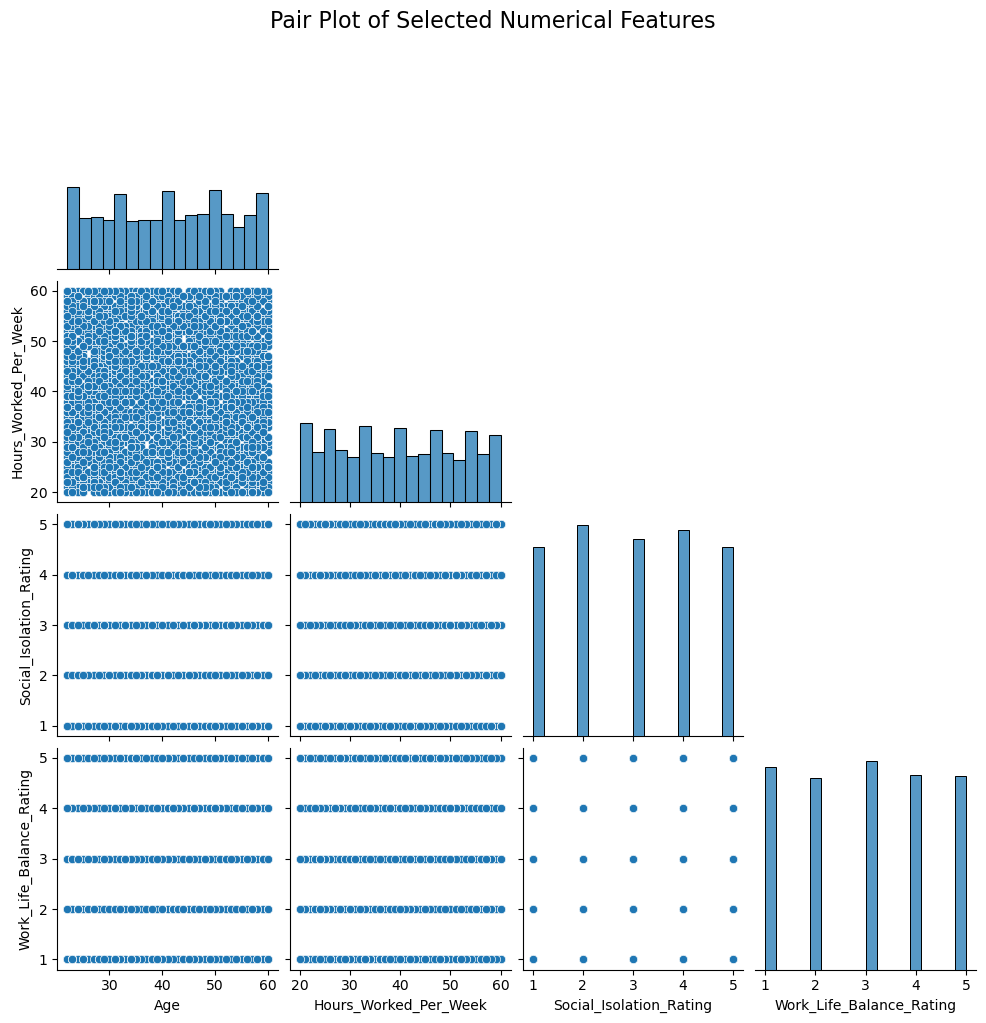

In [52]:
# Pair plot 

# Select relevant numerical features
numerical_features = ['Age', 'Hours_Worked_Per_Week', 'Social_Isolation_Rating', 'Work_Life_Balance_Rating']

# Generate the pair plot
sns.pairplot(df[numerical_features], corner=True, height=2.5)

# Add a title to the plot
plt.suptitle("Pair Plot of Selected Numerical Features", fontsize=16, y=1.02)

# Show the plot
plt.show()


In [ ]:
# Pair Plot Observations
# The plot reveals some distinct trends (e.g., between hours worked and work-life balance) while other variables exhibit no correlations.

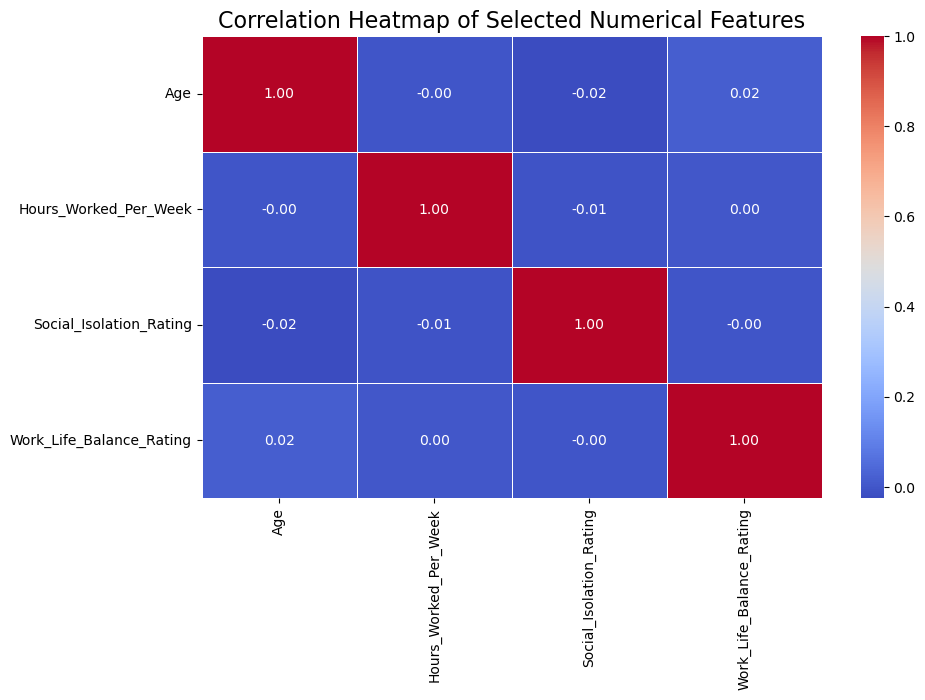

In [53]:
# Heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Age', 'Hours_Worked_Per_Week', 'Social_Isolation_Rating', 'Work_Life_Balance_Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Numerical Features", fontsize=16)
plt.show()


In [ ]:
# Heatmap Observations
#The strongest relationship observed is between Hours Worked Per Week and Work-Life Balance Rating, 
# emphasizing the impact of work hours on employee satisfaction.

In [54]:
# Anomaly detection

from sklearn.ensemble import IsolationForest

# Selecting numerical features for anomaly detection
anomaly_features = ['Age', 'Hours_Worked_Per_Week', 'Social_Isolation_Rating', 'Work_Life_Balance_Rating']

# Initializing the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fitting the model to the selected features
df['Anomaly'] = iso_forest.fit_predict(df[anomaly_features])

# Separating anomalies and normal instances
anomalies = df[df['Anomaly'] == -1]
normal_instances = df[df['Anomaly'] == 1]

# Count of anomalies detected
anomalies_count = len(anomalies)
anomalies_count


250

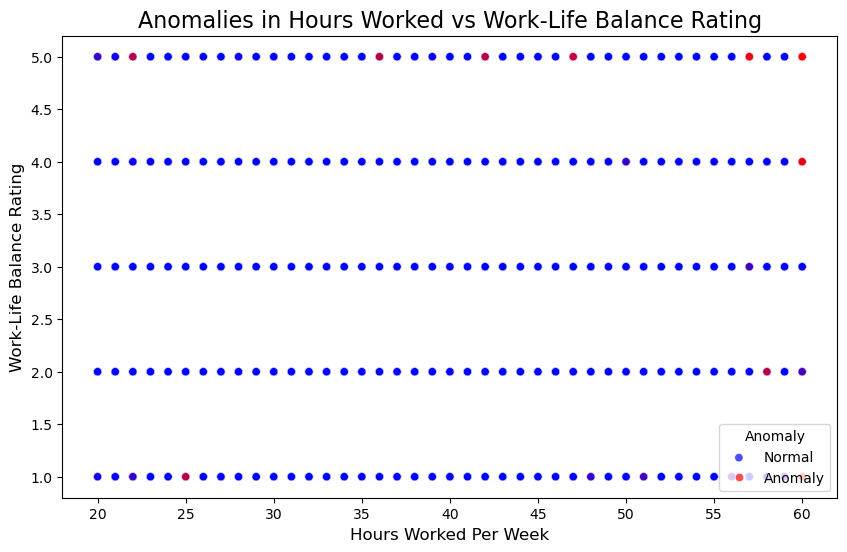

In [55]:
# Ensure that 'data' contains the necessary columns
if 'Hours_Worked_Per_Week' in df.columns and 'Work_Life_Balance_Rating' in df.columns:
    # Scatter plot to visualize anomalies
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=df['Hours_Worked_Per_Week'],
        y=df['Work_Life_Balance_Rating'],
        hue=df['Anomaly'],
        palette={1: 'blue', -1: 'red'},
        alpha=0.7
    )
    plt.title("Anomalies in Hours Worked vs Work-Life Balance Rating", fontsize=16)
    plt.xlabel("Hours Worked Per Week", fontsize=12)
    plt.ylabel("Work-Life Balance Rating", fontsize=12)
    plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
    plt.show()
else:
    print("Columns not found in the data. Verify the DataFrame structure.")



C:\Users\jadel\AppData\Local\Temp\ipykernel_8816\4162609533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = clusters



Silhouette Score for clustering: 0.33


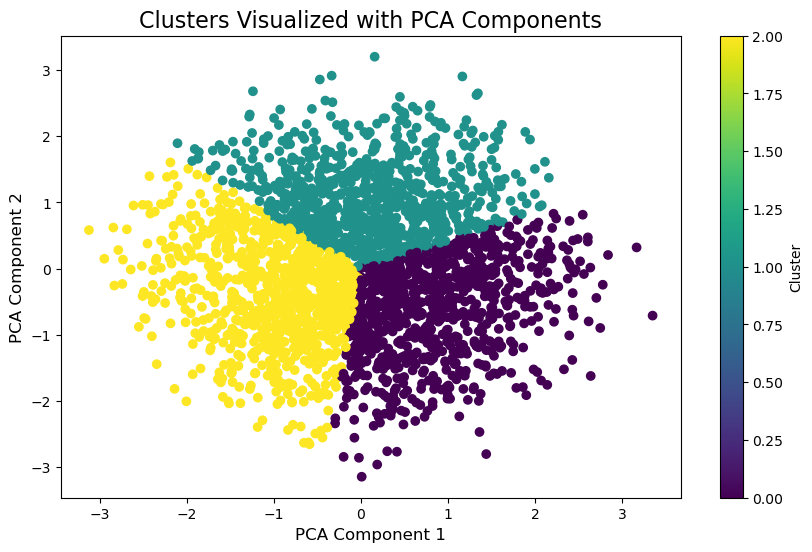

In [57]:
# Clustering Analysis
# Selecting numerical columns for clustering
data_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_pca)
df_cleaned['Cluster'] = clusters

# Silhouette Score
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"\nSilhouette Score for clustering: {silhouette_avg:.2f}")

# Visualizing Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized with PCA Components', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()
